# MACHINE LEARNING
-------------------------------
## What is it?

Machine Learning is a subset of Artificial Intelligence. It is a collection of techniques and algorithms used to predict or classify. It's used in areas such as image and speech recognition, recommendation systems, ranking and personalizing content - in an environment where you're handling lots of data, it's very likely you'll encounter machine learning. 

## 1) Linear Regression
Linear regression is one of the most basic examples of machine learning. It's used to express the mathematical relationship between two variables or attributes. It comes along with the assumption, of course, that there is a <i> linear </i> trend relationship between an outcome variable (dependent variable, label, etc...) and a predictor (independent variable, feature, etc...).

#### The Math of Linear Regression:
We can describe a line with a slope and intercept as $y = f(x) = \beta_0 + \beta_1*x$. In a simple example, you can imagine that for every umbrella your umbrella company sells, you make 25 dollars. If $y$ represents your profit, your relationship would be $y=25x$.

But say  your data wasn't so simple. Maybe you want to predict the number of new friends a person will add on social media given the amount of time they spend on the platform. Say you plot the data - you see that there's <i> sort of </i> a linear trend, but not exactly. 

Let's assume we can model our data with $y = \beta_0 + \beta_1$. The goal is to find the best $\beta_0, \beta_1$ that fits our data. We have a collection of (x,y) data points $(x_1,y_1), (x_2, y_2)...(x_m, y_m)$k we can use to estimate these parameters - we'll represent them in matrix format, so now our model looks like: 
$$y = x \cdot \beta$$

The way linear regression figures out the best value for $\beta$ is by minimizing the sum of the vertical distance between our predicted $\hat y_i$s and actual $y_i$s (this is called <i>least squares</i> estimation).

We define our error function as the "residual sum of squares":
$$RSS(\beta) = \sum_i(y_i-\beta x_i)^2$$

The optimal line is a function of $\beta$. To minimize $RSS(\beta) = (y-\beta x)^t(y-\beta x)$, we differentiate with respect to $\beta$, set the whole equation equal to 0, and solve for $\beta$. This results in:
$$\hat \beta = (x^tx)^{-1}x^ty$$

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, neighbors, linear_model
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


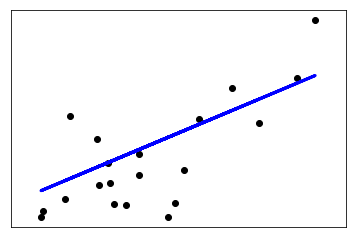

In [13]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [28]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


# Preprocessing
The next step is to split our dataset into its attributes and labels. The X variable will contain the first four columns of the dataset (i.e. attributes) while y will contain the labels. To do this, use the following code:

In [30]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 4].values  

# Train Test Split

In [38]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

# Feature Scaling
Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Luckily, sklearn has a built in scaling function

In [32]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

# Training and Predictions

In [33]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

# Evaluating the Algorithm

In [41]:
y_pred = classifier.predict(X_test)  

In [35]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[ 9  0  0]
 [ 0 12  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      0.92      0.96        13
         2.0       0.89      1.00      0.94         8

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



The results show that our KNN algorithm was able to classify all the 30 records in the test set with 100% accuracy, which is excellent. Although the algorithm performed very well with this dataset, don't expect the same results with all applications - KNN doesn't always perform as well with high-dimensionality or categorical features.

If you want to read up more on what the different evaluation metrics mean, I recommend this quick article:

https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

In [36]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

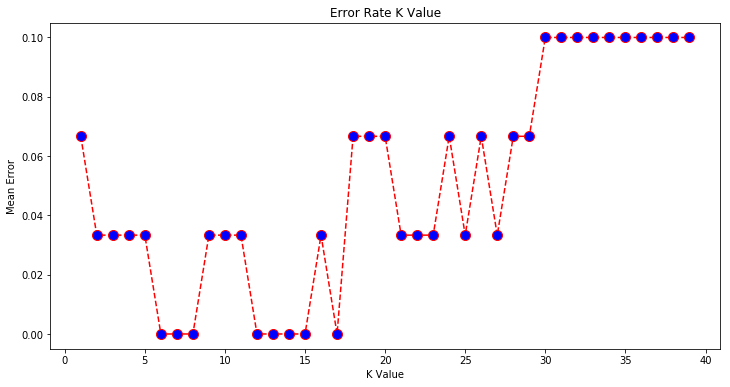

In [37]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

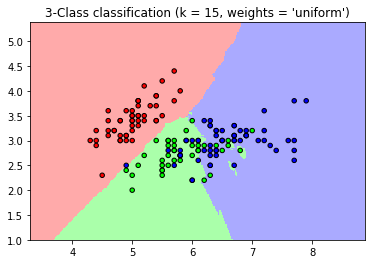

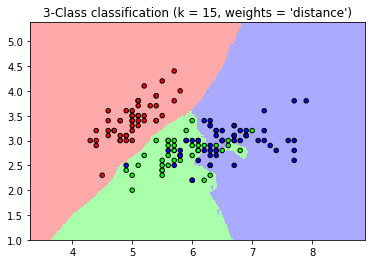

In [14]:
n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()